<a href="https://colab.research.google.com/github/Inferno-coder/MachineLearning/blob/main/Regression_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple Linear Regression

#importing the necessary libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.metrics import  mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [53]:
originalData=pd.read_csv('Salary_dataset.csv')
df=originalData
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


visualizing the salary Dataset


Text(0, 0.5, 'Salary')

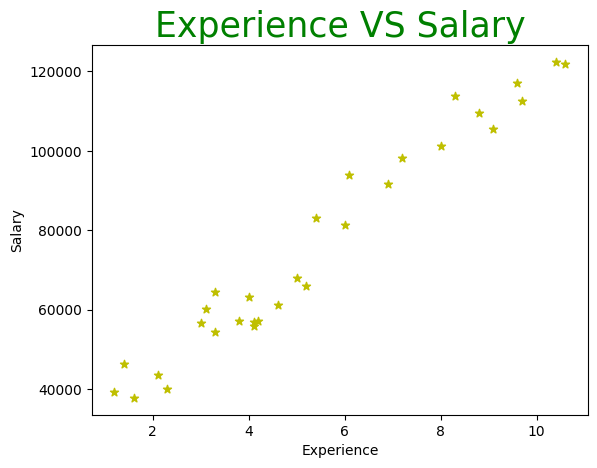

In [45]:
plt.scatter(df.YearsExperience,df.Salary,marker="*",color='y')
plt.title('Experience VS Salary' ,size=25,color='green')
plt.xlabel('Experience')
plt.ylabel('Salary')

In [59]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [60]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [61]:
from numpy.random.mtrand import random_sample
X=df['YearsExperience']
y=df['Salary']
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.3,random_state=0)

fitting the model:

In [65]:
Xtrain_sm=sm.add_constant(Xtrain)
model=sm.OLS(Ytrain,Xtrain_sm).fit()

In [67]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     310.7
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           3.12e-13
Time:                        06:03:40   Log-Likelihood:                -212.23
No. Observations:                  21   AIC:                             428.5
Df Residuals:                      19   BIC:                             430.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.584e+04   2973.820      8.690      0.000    1.96e+04    3.21e+04
YearsExperience  9360.2613    530.999     17.628      0.000    8248.868    1.05e+04
==============================================================================
Omnibus:                        2.217   Durbin-Watson:                   2.693
Prob(Omnibus):                  0.330   Jarque-Bera (JB):                1.289
Skew:                           0.296   Prob(JB):                        0.525
Kurtosis:                       1.940   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#visualizing the Regression line

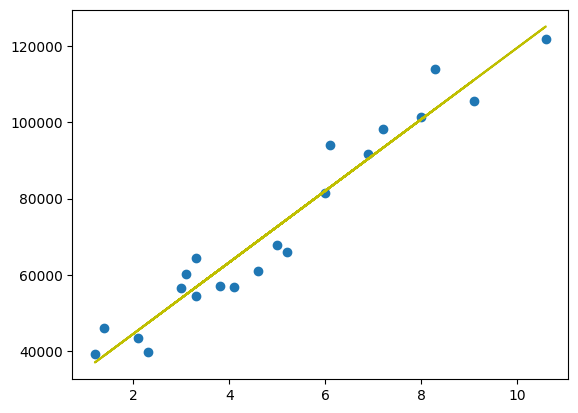

In [71]:
plt.scatter(Xtrain,Ytrain)
plt.plot(Xtrain,25840+Xtrain*9360.2623,'y')

In [90]:
Xtest_sm=sm.add_constant(Xtest)
yPred=model.predict(Xtest_sm)
yPred

2      40818.783270
28    123189.082589
13     65155.462615
10     63283.410357
26    115700.873560
24    108212.664531
27    116636.899689
11     64219.436486
17     76387.776158
dtype: float64

In [77]:
np.sqrt(mean_squared_error(Ytest,yPred))

4834.260936361731

In [78]:
r2_score(Ytest,yPred)

0.974099340721351

Analysing the test Data:

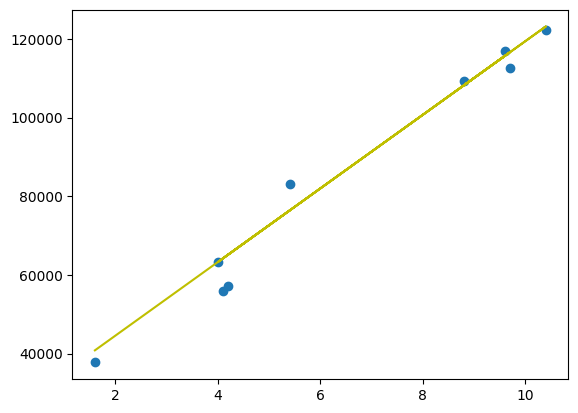

In [79]:
plt.scatter(Xtest,Ytest)
plt.plot(Xtest,25840+Xtest*9360.2623,'y')

In [94]:
model.predict([1,2.2])

array([46434.9400422])